In [1]:
import requests
import jieba.analyse
from collections import Counter

In [2]:
url = 'https://github.com/cjwu/cjwu.github.io/raw/master/courses/nlp/hw1-dataset.txt'
response = requests.get(url)

if response.status_code == 200:  # 確認狀態碼是 200 (OK)
    text = response.text  # 取得回應的文字內容
else:
    print('Error: Failed to download file')

In [3]:
words = list(jieba.cut(text))
word_freq = Counter(words)

# 計算 TF-IDF
top_keywords = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

result = []
for keyword, tfidf in top_keywords:
    if keyword in word_freq:
        result.append((keyword, word_freq[keyword], tfidf))

result = sorted(result, key=lambda x: (x[1], x[2]), reverse=True)[:100]

# 輸出結果
for keyword, freq, tfidf in result:
    print(keyword, freq, tfidf)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\iwin4\AppData\Local\Temp\jieba.cache
Loading model cost 0.719 seconds.
Prefix dict has been built successfully.


八卦 79119 0.19420501140555646
什麼 57760 0.19464509600157406
台灣 35851 0.12081408131496592
怎麼 33196 0.11186701189176337
可以 23236 0.022958278161416924
肥宅 21771 0.07336596927026089
是不是 21560 0.0355764318510935
真的 16890 0.026822655692091746
知道 14114 0.015811205555870015
自己 13560 0.013466423468451874
不是 11943 0.012758688475732879
現在 11279 0.03800903805058438
就是 11021 0.011178381502120506
不會 10751 0.036229733848907944
如果 10690 0.01195142064483163
還是 10589 0.03568381096884812
一個 10535 0.03550183667549485
中國 10230 0.034474018907481
一堆 10098 0.021680457381807062
這樣 9671 0.0325902479818425
有人 9666 0.013674560834915146
怎樣 8861 0.029860633581543415
時候 8806 0.02967528939386879
女生 8630 0.02055531365074145
日本 8594 0.012127572493474573
一樣 8514 0.028691280252032575
到底 8471 0.013855929767928526
不要 8245 0.011371977189677437
大家 7886 0.010829155333451544
沒有 7745 0.026099831518909124
... 7547 0.02543259244328046
很多 7488 0.010254718969681581
應該 7003 0.02359936993246231
喜歡 6782 0.02285462328744244
因為 6652 0.0224

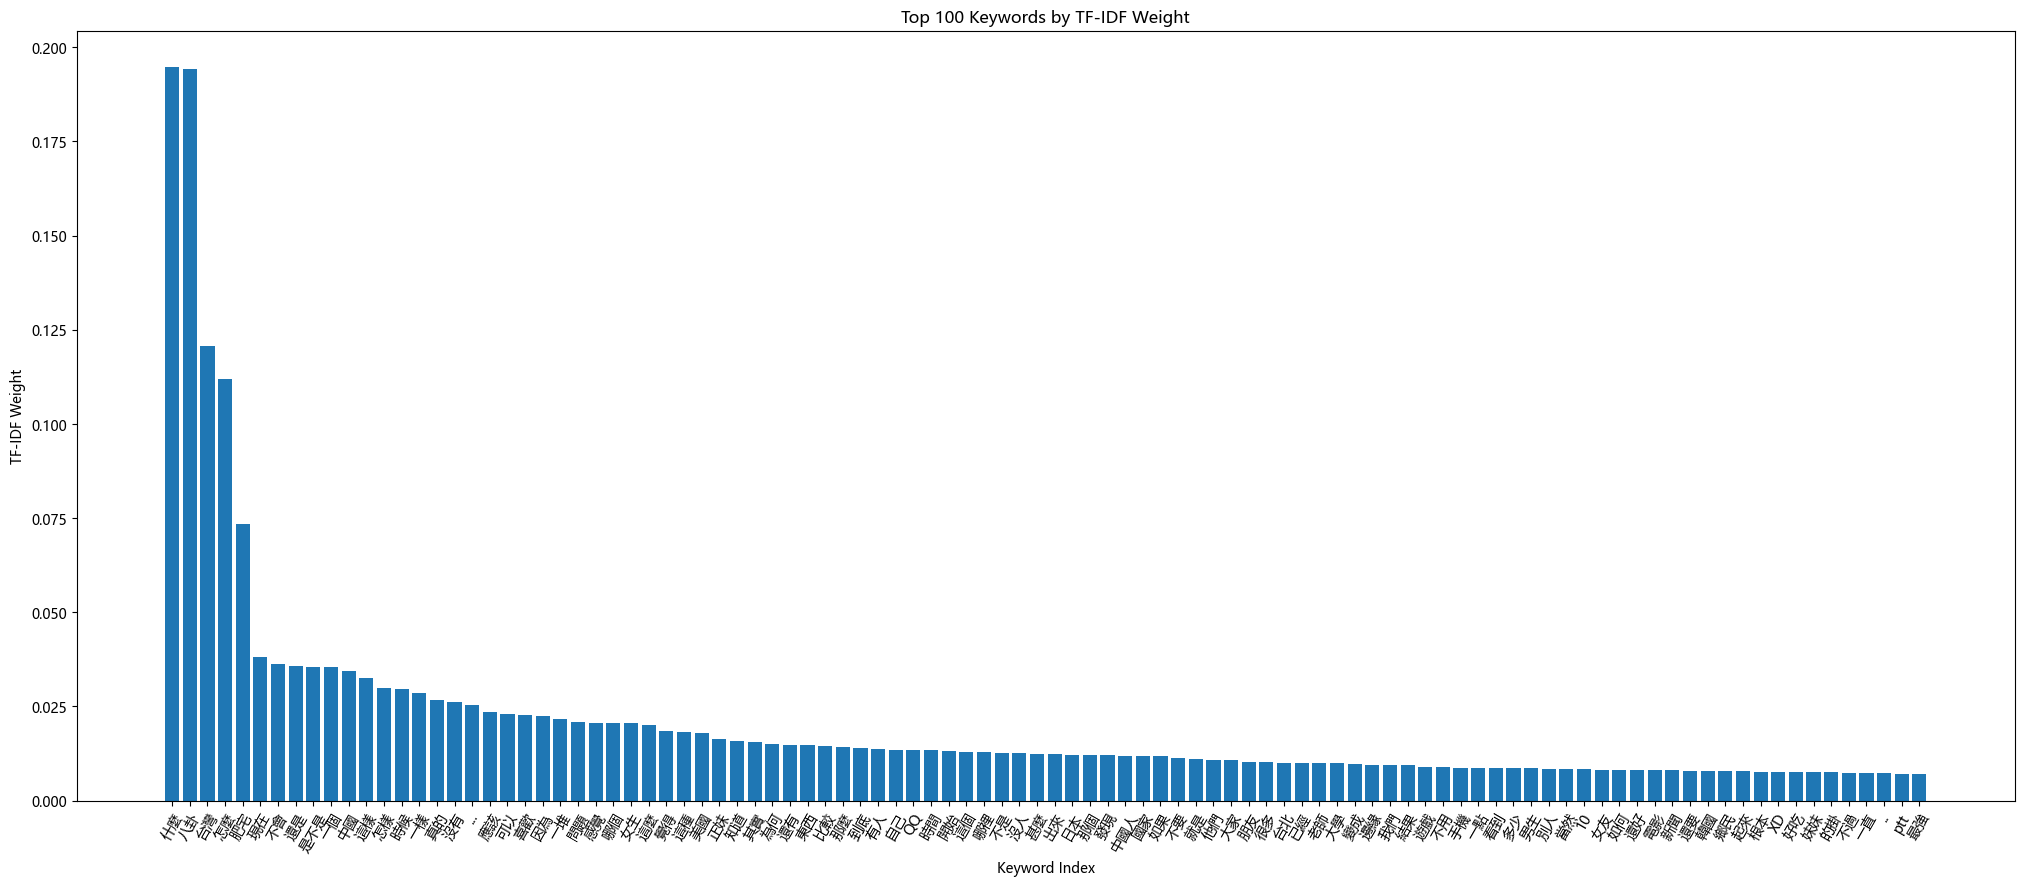

In [4]:
import matplotlib.pyplot as plt
result_weight = sorted(result, key=lambda x: x[2], reverse=True)[:100]
plt.rcParams['font.family'] = 'Microsoft YaHei'
x = range(len(result_weight))
y = [item[2] for item in result_weight]
plt.figure(figsize = (25,10))
plt.bar(x, y)
plt.xticks(range(len(result)), [keyword for keyword, freq, tfidf in result_weight], rotation=60)
plt.xlabel("Keyword Index")
plt.ylabel("TF-IDF Weight")
plt.title("Top 100 Keywords by TF-IDF Weight")

plt.show()

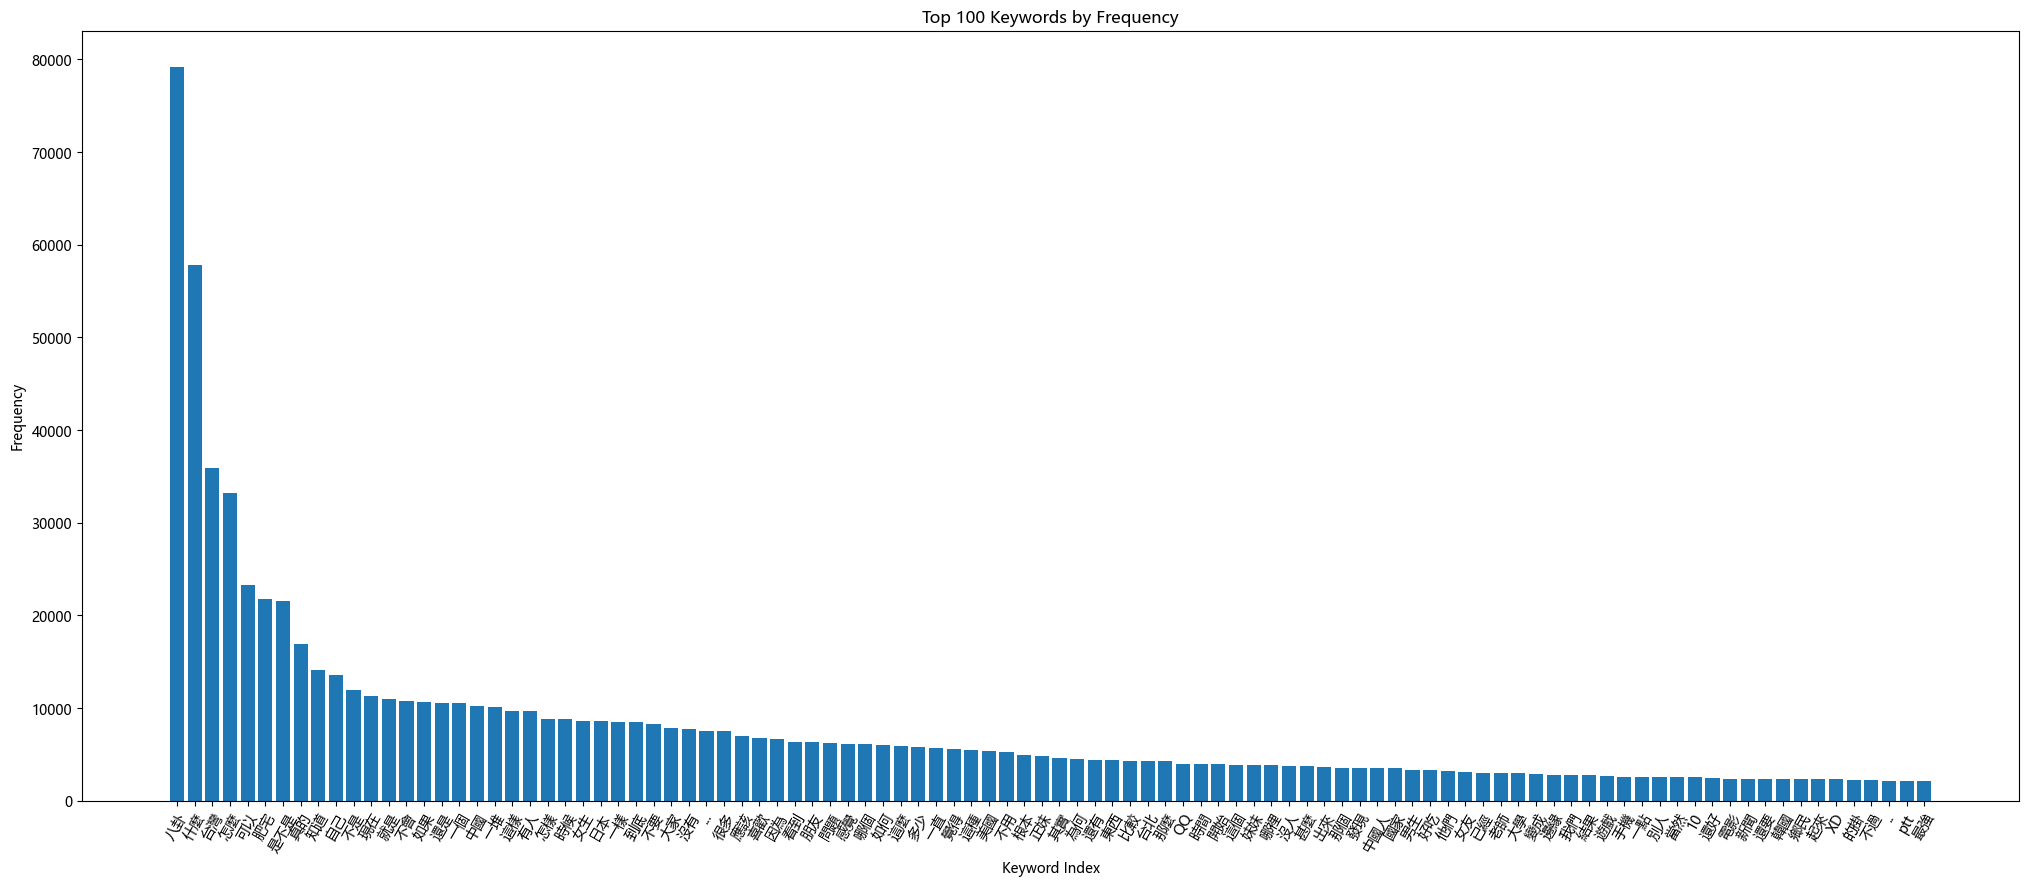

In [5]:
result_fre = sorted(result, key=lambda x: x[1], reverse=True)[:100]
x = range(len(result_fre))
y = [item[1] for item in result_fre]
plt.figure(figsize = (25,10))
plt.bar(x, y)
plt.xlabel("Keyword Index")
plt.ylabel("Frequency")
plt.title("Top 100 Keywords by Frequency")
plt.xticks(x,[keyword for keyword, freq, tfidf in result_fre], rotation=60)
plt.show()

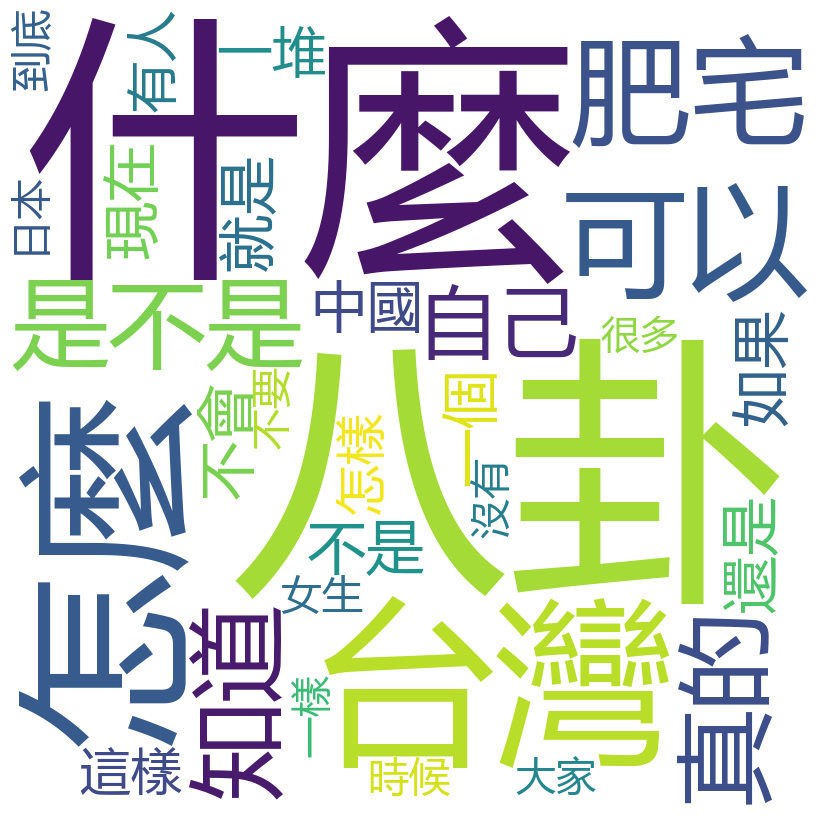

In [6]:
from wordcloud import WordCloud
res_fre = [x[0] for x in result_fre]
result_32 = " ".join(res_fre[:32])

# 生成文字雲
wc = WordCloud(width=800, height=800, background_color='white', font_path='msyh.ttc', max_words=32).generate(result_32)

# 繪製文字雲
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()